In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [11]:
!echo 'number of buttons: ' && ls -l './buttons/' | wc -l
!ls -lt './buttons/' | head -6

number of buttons: 
     350
total 10544
-rwxr-xr-x@ 1 truepk  staff  20695 14 Mar 15:08 09.png
-rwxr-xr-x@ 1 truepk  staff   1028 14 Mar 15:08 1.png
-rwxr-xr-x@ 1 truepk  staff  12780 14 Mar 15:08 1095.png
-rwxr-xr-x@ 1 truepk  staff   9664 14 Mar 15:08 1106.png
-rwxr-xr-x@ 1 truepk  staff  18666 14 Mar 15:08 1109.png


In [76]:
from PIL import Image

import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
from sklearn.preprocessing import binarize

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

im = Image.open("./buttons/09.png")
img_data = np.asarray(im)
img_gr_data = rgb2gray(img_data).astype(np.int32)
img_bin_data = binarize(img_gr_data, threshold=250)
img_1d_data = img_bin_data.ravel()

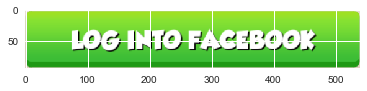

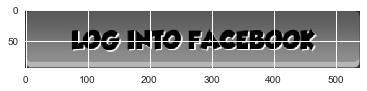

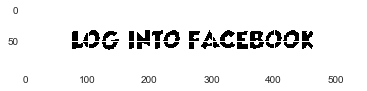

In [75]:
imshow(img_data)
plt.show()

imshow(img_gr_data)
plt.show()

imshow(img_bin_data)
plt.show()

In [172]:
img_pd = pd.DataFrame(img_1d_data, columns=['color'])

img_pd['x'] = np.array(
    [[i for i in range(img_bin_data.shape[1])] for _ in range(img_bin_data.shape[0])]
).ravel()

img_pd['y'] = np.array(
    [[k for _ in range(img_bin_data.shape[1])] for k in range(img_bin_data.shape[0])]
).ravel()

img_pd['cluster'] = -1

In [176]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2)
clusters = dbscan.fit_predict(img_pd[img_pd['color'] == 1][['x', 'y']].values)
img_pd.loc[img_pd['color'] == 1, 'cluster'] = clusters

print set(clusters)

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])


In [179]:
import random

colors = {}
for cl in set(clusters):
    r = lambda: random.randint(0,255)
    colors[cl] = '#%02X%02X%02X' % (r(),r(),r())
colors[-1] = '#FFFFFF'

def get_tuple_color(color_hex):
    color = color_hex.lstrip('#')
    return list(tuple(int(color[i:i+2], 16) for i in (0, 2 ,4))) + [255]

In [180]:
img_pd['color_hex'] = img_pd.cluster.apply(lambda x: colors[x])

In [206]:
def pandas_to_img(data, shape):
    result_arr = np.zeros(shape)
    for row in range(shape[0]):
        for col in range(shape[1]):
            result_arr[row, col] = \
                data[(data.x == col) & (data.y == row)].color_hex.apply(get_tuple_color).values[0]

    return result_arr.astype(np.uint8)

In [195]:
img_clustered = pandas_to_img(img_pd, img_data.shape)

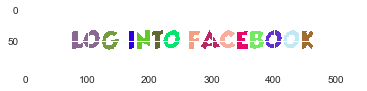

In [205]:
imshow(img_clustered)